In [1]:
# lstm autoencoder recreate sequence
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import os 
os.chdir(r'C:\Users\majichkar\OneDrive - Infocepts Technologies Pvt. Ltd\Desktop\Path Seg ADNI Encoder Clustering')

In [2]:
from data_loader import import_data

In [3]:
data_name = 'sample'
data_x, data_y, y_type = import_data(data_name = data_name)

In [4]:
data_y.shape,data_x.shape

((1346, 23, 3), (1346, 23, 35))

In [5]:
features = 35
t_series = 23
patients = data_x.shape[0]

In [6]:
sequence = np.array(data_x).reshape((patients, t_series, features))

In [140]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(t_series, features),return_sequences=False, name = 'Encoder_1'))
#model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(RepeatVector(t_series, name = 'Repeater_bridge'))
#model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu', return_sequences=True, name = 'Decoder_1'))
model.add(TimeDistributed(Dense(features),name = 'Time_Distributed'))
model.compile(optimizer='adam', loss='mse')
model.build()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder_1 (LSTM)             (None, 200)               188800    
_________________________________________________________________
Repeater_bridge (RepeatVecto (None, 23, 200)           0         
_________________________________________________________________
Decoder_1 (LSTM)             (None, 23, 200)           320800    
_________________________________________________________________
Time_Distributed (TimeDistri (None, 23, 35)            7035      
Total params: 516,635
Trainable params: 516,635
Non-trainable params: 0
_________________________________________________________________
None


In [142]:
# fit model
history = model.fit(sequence, sequence, epochs=50)

Epoch 1/50
43/43 [==============================] - 3s 65ms/step - loss: 0.2483
Epoch 2/50
43/43 [==============================] - 3s 60ms/step - loss: 0.2460
Epoch 3/50
43/43 [==============================] - 3s 63ms/step - loss: 0.2452
Epoch 4/50
43/43 [==============================] - 2s 57ms/step - loss: 0.4457
Epoch 5/50
43/43 [==============================] - 3s 59ms/step - loss: 0.3682
Epoch 6/50
43/43 [==============================] - 3s 60ms/step - loss: 0.3241
Epoch 7/50
43/43 [==============================] - 3s 61ms/step - loss: 1.9171
Epoch 8/50
43/43 [==============================] - 3s 59ms/step - loss: 1.0962
Epoch 9/50
43/43 [==============================] - 2s 56ms/step - loss: 3.8796
Epoch 10/50
43/43 [==============================] - 4s 93ms/step - loss: 18.8766
Epoch 11/50
43/43 [==============================] - 3s 75ms/step - loss: 4.0147
Epoch 12/50
43/43 [==============================] - 3s 64ms/step - loss: 3.4109
Epoch 13/50
43/43 [=================

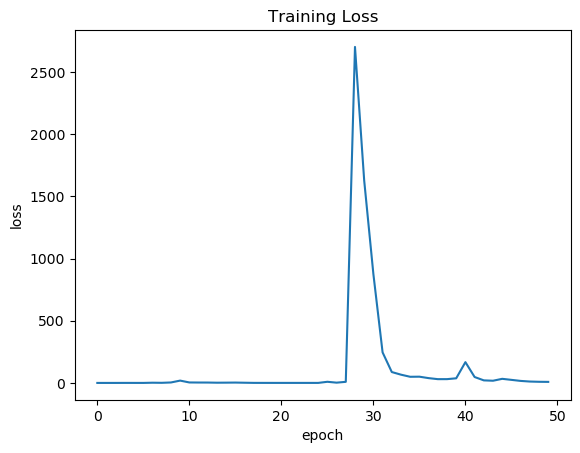

In [143]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [144]:
# demonstrate recreation
yhat = model.predict(sequence)
print(yhat[0,0,:])

[-0.8205568  -3.5074987   1.5128691   2.869895    5.419638   -4.256639
  1.4587532  -5.4913864  -2.1235335   4.627337    3.061267   -1.9038972
  1.1393211  -1.4377792   0.48425376  6.2105308  -3.8446589   2.8058789
  3.6536343  -2.2058432   1.287914   -2.6107702   4.631878   -4.2458987
  3.5417159   2.2539327  -2.1772103  -2.476132    5.1007032  -1.4359839
  1.4404842  -4.3229294  -5.341699    4.8068533  -1.0057466 ]


In [145]:
sequence[0,0,:]

array([ 0.5       ,  0.09977272, -0.04877722, -0.72950245, -0.72783337,
        0.0646074 ,  0.36604982,  0.44940294, -0.23589747,  0.6010358 ,
        0.67764268,  0.07600899,  2.78369635,  1.92864383,  3.37061928,
        1.29990373, -0.35800848,  2.91987595,  0.81868748, -1.78506959,
       -0.31503332,  0.58292771, -0.18100734, -0.0719102 , -0.38049727,
       -0.04347266, -0.13275914, -0.20194485, -0.02070966, -0.09346397,
       -0.03706406,  0.27192107, -0.17143803,  0.18451442, -0.06627223])

In [146]:
encoder_layer = Model(inputs=model.inputs, outputs=model.layers[0].output)
encoded_features = np.array(encoder_layer.predict(sequence))

In [147]:
encoded_features.shape

(1346, 200)

In [148]:
df = pd.DataFrame(encoded_features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.189823,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.930284e+02,...,0.000000e+00,0.000000e+00,0.0,107.882019,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,0.001480,0.000000,0.000000e+00,4.727074e-23,1.855723e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.336240e+00,...,2.791600e-18,3.509013e-13,0.0,0.413132,1.177105e-25,0.000000e+00,2.089508e-08,0.0,2.331323e-09,1.624714e-12
2,0.022856,0.000000,0.000000e+00,0.000000e+00,1.707138e-27,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.650936e-18,...,0.000000e+00,0.000000e+00,0.0,42.437267,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3,0.000020,0.000000,1.305569e-15,0.000000e+00,2.656018e-06,7.034621e-11,1.570750e-18,3.693550e-26,0.0,9.239889e+00,...,4.092198e-11,0.000000e+00,0.0,0.661016,4.547396e-06,5.342741e-12,0.000000e+00,0.0,1.034898e-05,2.631519e-06
4,0.000000,0.000013,0.000000e+00,4.236706e-01,0.000000e+00,1.767824e-25,0.000000e+00,0.000000e+00,0.0,7.789957e+00,...,5.082527e-13,0.000000e+00,0.0,14.744555,1.869926e-16,1.252487e-24,7.175422e-12,0.0,1.711334e-08,4.293570e-04


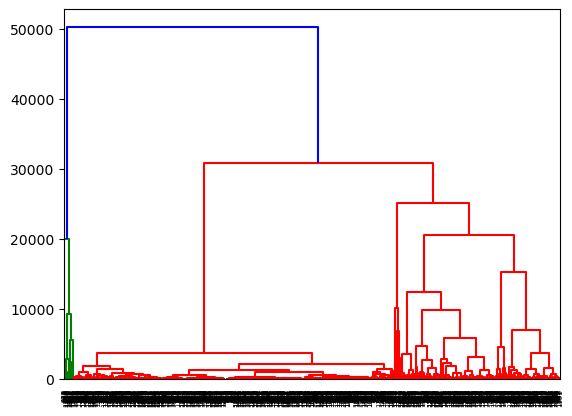

In [149]:
#Plotting Dendograms
import scipy.cluster.hierarchy as shc
plt.figure()
Dendrogram = shc.dendrogram((shc.linkage(df, method ='ward')))
plt.show()

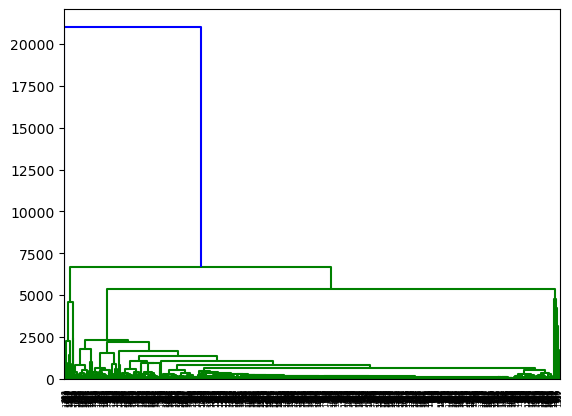

In [150]:
import scipy.cluster.hierarchy as shc
plt.figure()
Dendrogram = shc.dendrogram((shc.linkage(df, method ='average')))
plt.show()

In [151]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [152]:
clu_model = AgglomerativeClustering(n_clusters = 4,linkage='ward')
labels = clu_model.fit_predict(df)

In [153]:
labels

array([1, 2, 0, ..., 0, 2, 1], dtype=int64)

In [154]:
import collections
print(collections.Counter(labels))

Counter({2: 872, 0: 433, 1: 24, 3: 17})


In [155]:
mtrcs = ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock']

In [156]:
for i in mtrcs:
    print(i,"- Silhouette Score:",metrics.silhouette_score(df,labels,metric = i))

euclidean - Silhouette Score: 0.55195373
l2 - Silhouette Score: 0.55195373
l1 - Silhouette Score: 0.5434041009121802
manhattan - Silhouette Score: 0.5434041009121802
cityblock - Silhouette Score: 0.5434041009121802


In [157]:
df_labels = df.copy()
df_labels['labels']=labels
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,labels
0,0.189823,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.930284e+02,...,0.000000e+00,0.0,107.882019,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1
1,0.001480,0.000000,0.000000e+00,4.727074e-23,1.855723e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.336240e+00,...,3.509013e-13,0.0,0.413132,1.177105e-25,0.000000e+00,2.089508e-08,0.0,2.331323e-09,1.624714e-12,2
2,0.022856,0.000000,0.000000e+00,0.000000e+00,1.707138e-27,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.650936e-18,...,0.000000e+00,0.0,42.437267,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0
3,0.000020,0.000000,1.305569e-15,0.000000e+00,2.656018e-06,7.034621e-11,1.570750e-18,3.693550e-26,0.0,9.239889e+00,...,0.000000e+00,0.0,0.661016,4.547396e-06,5.342741e-12,0.000000e+00,0.0,1.034898e-05,2.631519e-06,2
4,0.000000,0.000013,0.000000e+00,4.236706e-01,0.000000e+00,1.767824e-25,0.000000e+00,0.000000e+00,0.0,7.789957e+00,...,0.000000e+00,0.0,14.744555,1.869926e-16,1.252487e-24,7.175422e-12,0.0,1.711334e-08,4.293570e-04,2


In [158]:
from sklearn.cluster import KMeans

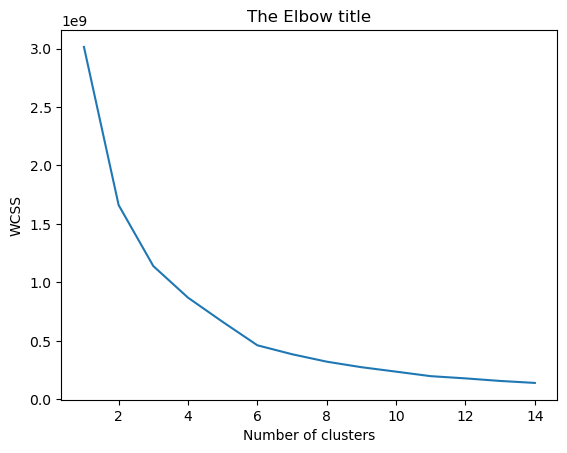

In [159]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [160]:
kmeans = KMeans(7)
kmeans.fit(df)

KMeans(n_clusters=7)

In [161]:
labels_k = kmeans.fit_predict(df)
labels_k

array([1, 0, 2, ..., 2, 0, 6])

In [171]:
import collections
print(dict(collections.Counter(labels_k)))

{1: 25, 0: 1017, 2: 169, 5: 104, 4: 17, 6: 13, 3: 1}


In [172]:
for i in mtrcs:
    print(i,"- Silhouette Score:",metrics.silhouette_score(df,labels_k,metric = i))

euclidean - Silhouette Score: 0.6896261
l2 - Silhouette Score: 0.6896261
l1 - Silhouette Score: 0.6369324890679867
manhattan - Silhouette Score: 0.6369324890679867
cityblock - Silhouette Score: 0.6369324890679867
